In [1]:
## this program is written and run in google colab with GPU support
## writer :Tanvir rahman

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
## create some x_data
## we use the linspace for that
## from 0 to 10 about 1000000 value between them
x_data = np.linspace(0.0,10.0,1000000)


In [4]:
len(x_data)
## we gonna add some noise to that data to

1000000

In [0]:
## adding some noise data of 1000000 and add it ti the xdata
noise = np.random.randn(len(x_data)) ## noise of some random value

In [6]:
noise.shape

(1000000,)

In [7]:
noise  ## everything we try to do is random distribution

array([-0.45452542, -0.63643215, -0.54745424, ...,  1.27531139,
       -0.43334886,  1.25852829])

In [0]:
## y=mx+b this equation has to be fit in this data
## creating the y value for the x data

#m=.5
#b=5
## this is the original data
## in th model we first assume and then converge


y_true=(.5*x_data)+5+noise

In [0]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [0]:
y_df = pd.DataFrame(data=y_true,columns=['Y Data'])

In [0]:
my_data = pd.concat([x_df,y_df],axis=1)

In [12]:
my_data.head()

,X Data,Y Data
0,0.00000,4.545475
1,0.00001,4.363573
2,0.00002,4.452556
3,0.00003,4.644311
4,0.00004,6.008611


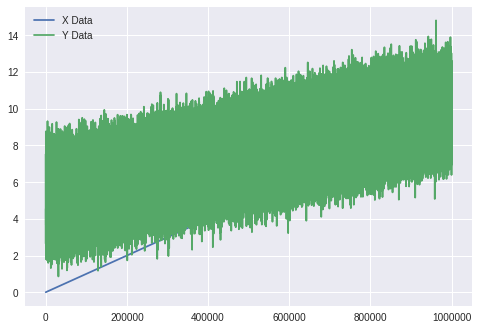

In [13]:
my_data.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


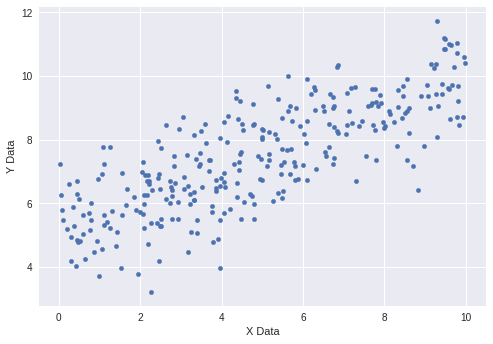

In [14]:
## its too dense lets take the sample 
my_data.sample(n=300).plot(kind='scatter',x='X Data',y='Y Data')

In [0]:
## the data is too big we use the batch and feed the data batch wise
batch_size = 8

In [16]:
## lets add two value in the m and b just randomwise
## remember weight is always variable and data is always a placeholder
m=tf.Variable(0.81)
b=tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
## add the placeholder
## we have to add the placeholder for x and y
## we add the two parameter both datatype and size of the data
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [0]:
## we create the placeholder and also the Variable now we create the model
y_model = m*xph+b

In [0]:
## now we have to give the loss function
loss = tf.reduce_mean(tf.square(yph-y_model))

In [0]:
## optimize the loss
## make the optoization
learning_rate=.001
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [0]:
##initialize the variable
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
  sess.run(init)
  ## we use the 1000 batch
  batchs=1000
  ## we use random index of batch_size so the data will be feed randomly
  for i in range(batchs):
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    # first argument is the limit and second is how many data will be genarated
    ## we need the feed dict
    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])
    
    print("batch :"+str(i))
    print('--------------')
    print('m = '+str(model_m)+' b= '+str(model_b))
    

batch :0
--------------
m = 0.8326047 b= 0.17583202
batch :1
--------------
m = 0.8537118 b= 0.18245918
batch :2
--------------
m = 0.87880856 b= 0.18766688
batch :3
--------------
m = 0.9019856 b= 0.19443135
batch :4
--------------
m = 0.9196176 b= 0.1983113
batch :5
--------------
m = 0.9430783 b= 0.20471434
batch :6
--------------
m = 0.96123093 b= 0.21080948
batch :7
--------------
m = 0.9775568 b= 0.2152398
batch :8
--------------
m = 0.99568594 b= 0.2204264
batch :9
--------------
m = 1.0127792 b= 0.22411783
batch :10
--------------
m = 1.0310143 b= 0.23030482
batch :11
--------------
m = 1.0431771 b= 0.23417346
batch :12
--------------
m = 1.0617454 b= 0.23997056
batch :13
--------------
m = 1.0680048 b= 0.24481319
batch :14
--------------
m = 1.0771999 b= 0.25117588
batch :15
--------------
m = 1.0802587 b= 0.25286883
batch :16
--------------
m = 1.0753646 b= 0.25323948
batch :17
--------------
m = 1.0849806 b= 0.25993747
batch :18
--------------
m = 1.0827079 b= 0.26123255
bat

In [23]:
model_m

0.9576998

In [24]:
model_b

2.0485585

In [0]:
y_hat = x_data*model_m+model_b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


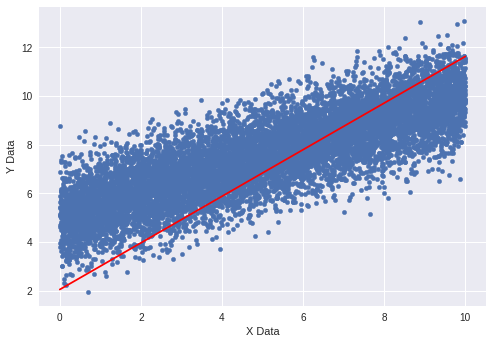

In [29]:
my_data.sample(10000).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(x_data,y_hat,'r')